<a href="https://www.kaggle.com/code/punyamodi/tesla-stock-prediciting?scriptVersionId=136293398" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tesla-inc-last-5-years-stock-historical-data/TSLA Testing.csv
/kaggle/input/tesla-inc-last-5-years-stock-historical-data/TSLA training.csv


In [2]:
training=pd.read_csv('/kaggle/input/tesla-inc-last-5-years-stock-historical-data/TSLA training.csv')
print(training.head())
print(training.tail())

         Date       Open       High        Low      Close  Adj Close  \
0  2018-06-22  23.436001  23.483334  22.133333  22.242001  22.242001   
1  2018-06-25  22.007999  22.564667  21.833332  22.200666  22.200666   
2  2018-06-26  22.403334  22.903334  21.719999  22.799999  22.799999   
3  2018-06-27  23.000000  23.386000  22.633333  22.966667  22.966667   
4  2018-06-28  23.243999  23.801332  23.073999  23.328667  23.328667   

      Volume  
0  153991500  
1  103969500  
2  111787500  
3  125005500  
4  125970000  
            Date        Open        High         Low       Close   Adj Close  \
1252  2023-06-14  260.170013  261.570007  250.500000  256.790009  256.790009   
1253  2023-06-15  248.399994  258.950012  247.289993  255.899994  255.899994   
1254  2023-06-16  258.920013  263.600006  257.209991  260.540009  260.540009   
1255  2023-06-20  261.500000  274.750000  261.119995  274.450012  274.450012   
1256  2023-06-21  275.130005  276.989990  257.779999  259.459991  259.459991 

In [3]:
training.shape
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1257 non-null   object 
 1   Open       1257 non-null   float64
 2   High       1257 non-null   float64
 3   Low        1257 non-null   float64
 4   Close      1257 non-null   float64
 5   Adj Close  1257 non-null   float64
 6   Volume     1257 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


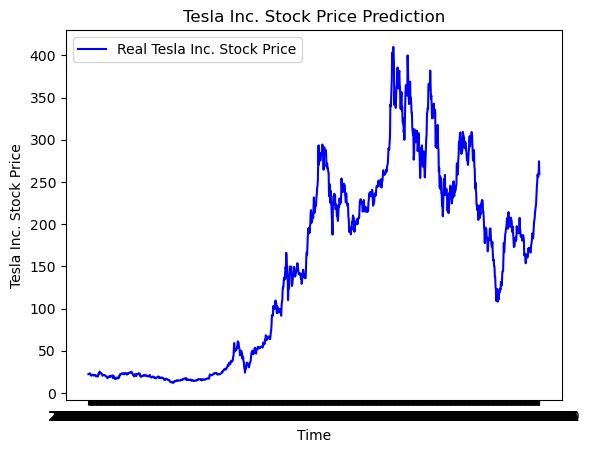

In [4]:
# Visualising the results
plt.plot(training["Date"],training["Close"], color='blue', label='Real Tesla Inc. Stock Price')
plt.title('Tesla Inc. Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Tesla Inc. Stock Price')
plt.legend()
plt.show()

In [5]:
print(training['Close'].equals(training['Adj Close']))

True


From this we can see that dataset has no non-null values, and has shape 1257x7

also we get to know column close and adj close are same so we can remove adj close from datat set

In [6]:
X=pd.DataFrame()
X=training[["Open","High","Low","Volume"]].copy()
y=pd.Series()
y=training[["Close"]].copy()
X.shape

/tmp/ipykernel_20/1774975027.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  y=pd.Series()


(1257, 4)

In [7]:
y.shape

(1257, 1)

Hence i have succesfully created 2 dataframes with relevant data needed to feed to ml model

Converting all data within 0 to 1 range

In [8]:
#from sklearn.preprocessing import MinMaxScaler
#sc = MinMaxScaler(feature_range=(0,1))
#X= sc.fit_transform(X)
#y=sc.fit_transform(y)

In [9]:
print(y)
print(X)

           Close
0      22.242001
1      22.200666
2      22.799999
3      22.966667
4      23.328667
...          ...
1252  256.790009
1253  255.899994
1254  260.540009
1255  274.450012
1256  259.459991

[1257 rows x 1 columns]
            Open        High         Low     Volume
0      23.436001   23.483334   22.133333  153991500
1      22.007999   22.564667   21.833332  103969500
2      22.403334   22.903334   21.719999  111787500
3      23.000000   23.386000   22.633333  125005500
4      23.243999   23.801332   23.073999  125970000
...          ...         ...         ...        ...
1252  260.170013  261.570007  250.500000  170575500
1253  248.399994  258.950012  247.289993  160171200
1254  258.920013  263.600006  257.209991  167563700
1255  261.500000  274.750000  261.119995  165611200
1256  275.130005  276.989990  257.779999  210937500

[1257 rows x 4 columns]


In [10]:
from sklearn.model_selection import train_test_split
# using the train test split function
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=104,test_size=0.25,shuffle=False)


In [11]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
y_pred=reg.predict(X_test)
print(reg.score(X_test, y_test))
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, y_pred))
print(y_test,y_pred)
print(y_test-y_pred)

0.9969740583127749
2.5161844192266307
           Close
942   307.053345
943   331.326660
944   333.036682
945   337.973328
946   336.880005
...          ...
1252  256.790009
1253  255.899994
1254  260.540009
1255  274.450012
1256  259.459991

[315 rows x 1 columns] [[310.92795198]
 [327.90568016]
 [343.60976786]
 [335.13648897]
 [336.91770436]
 [361.45195471]
 [361.83212262]
 [368.21642025]
 [362.27680619]
 [360.21298535]
 [376.51368268]
 [370.56124055]
 [347.156128  ]
 [349.62356851]
 [343.44209084]
 [333.30583877]
 [333.73408216]
 [338.11172521]
 [332.24324804]
 [332.96955642]
 [341.03040306]
 [329.89746203]
 [342.77882057]
 [338.42860426]
 [333.84994496]
 [301.61138361]
 [299.47318445]
 [279.35768657]
 [301.6879473 ]
 [296.97295796]
 [303.15938289]
 [311.61522866]
 [293.53334059]
 [284.20185122]
 [266.9009887 ]
 [262.8959541 ]
 [251.56190307]
 [245.62410239]
 [255.98616057]
 [243.71954582]
 [249.14657497]
 [241.34706452]
 [240.14894455]
 [219.04021964]
 [221.17327806]
 [209.13692055

In [12]:
import pandas as pd
data=[[276.49,284.25,275.11,119685900]]
df = pd.DataFrame(data, columns=["Open","High","Low","Volume"])
y_pred=reg.predict(df)
print(y_pred)

[[282.0642092]]


In [13]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[4]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])
model.compile(
    optimizer='adam',
    loss='mae',
)
history = model.fit(
    X_train,y_train,
    validation_data=(X_test, y_test),
    batch_size=256,
    epochs=81,
)


/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

Epoch 1/81
4/4 [==============================] - 1s 90ms/step - loss: 13793534.0000 - val_loss: 8426526.0000
Epoch 2/81
4/4 [==============================] - 0s 23ms/step - loss: 10225613.0000 - val_loss: 2801456.2500
Epoch 3/81
4/4 [==============================] - 0s 24ms/step - loss: 4551960.0000 - val_loss: 1417601.3750
Epoch 4/81
4/4 [==============================] - 0s 24ms/step - loss: 2027154.1250 - val_loss: 2563160.2500
Epoch 5/81
4/4 [==============================] - 0s 25ms/step - loss: 3682366.2500 - val_loss: 60800.6094
Epoch 6/81
4/4 [==============================] - 0s 23ms/step - loss: 2894092.2500 - val_loss: 3009445.5000
Epoch 7/81
4/4 [==============================] - 0s 23ms/step - loss: 1927996.6250 - val_loss: 897867.8125
Epoch 8/81
4/4 [==============================] - 0s 28ms/step - loss: 1154301.1250 - val_loss: 1383272.7500
Epoch 9/81
4/4 [==============================] - 0s 23ms/step - loss: 1127127.3750 - val_loss: 948656.8750
Epoch 10/81
4/4 [====

In [14]:
results = model.evaluate(X_test, y_test, batch_size=128)
print("test loss, test acc:", results)

3/3 [==============================] - 0s 5ms/step - loss: 10688.7090
test loss, test acc: 10688.708984375


In [15]:
X_test.head


<bound method NDFrame.head of             Open        High         Low     Volume
942   304.993347  314.283325  302.363342   81981600
943   310.000000  332.619995  307.250000  105868500
944   326.646667  346.899994  325.466675  120676200
945   336.576660  341.496674  329.600006   68920800
946   336.000000  340.600006  332.440002   62031600
...          ...         ...         ...        ...
1252  260.170013  261.570007  250.500000  170575500
1253  248.399994  258.950012  247.289993  160171200
1254  258.920013  263.600006  257.209991  167563700
1255  261.500000  274.750000  261.119995  165611200
1256  275.130005  276.989990  257.779999  210937500

[315 rows x 4 columns]>

In [16]:
prediction = model.predict([[304.993347,314.283325,302.363342,81981600]])
print("prediction shape:", prediction.shape)
print(y_test,prediction)

1/1 [==============================] - 0s 137ms/step
prediction shape: (1, 1)
           Close
942   307.053345
943   331.326660
944   333.036682
945   337.973328
946   336.880005
...          ...
1252  256.790009
1253  255.899994
1254  260.540009
1255  274.450012
1256  259.459991

[315 rows x 1 columns] [[7856.4517]]


In [17]:
from xgboost import XGBRegressor

my_model = XGBRegressor()
# Add silent=True to avoid printing out updates with each cycle
my_model.fit(X,y)

# make predictions for test data
predictions = my_model.predict(X_test)
print(y_test,predictions)

from sklearn.metrics import mean_absolute_error   
meanerror = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error:" % (meanerror))

           Close
942   307.053345
943   331.326660
944   333.036682
945   337.973328
946   336.880005
...          ...
1252  256.790009
1253  255.899994
1254  260.540009
1255  274.450012
1256  259.459991

[315 rows x 1 columns] [307.40488  331.1889   333.2611   337.4324   337.06613  362.92026
 366.34897  364.5456   359.49142  361.45132  381.1046   363.797
 348.74988  352.0182   342.33566  325.38348  329.405    340.27576
 328.38596  334.99835  342.57468  325.70648  336.9516   334.8385
 331.76123  292.0089   293.78128  292.4276   290.2564   300.48795
 302.86795  317.17023  291.4668   288.68686  262.49857  266.25858
 244.80322  242.70018  255.243    241.55669  252.92024  236.91928
 237.02477  221.39354  224.29736  209.59985  220.04623  235.57944
 251.91663  252.30533  246.66339  257.77753  234.9047   238.0259
 238.691    242.17381  240.10008  232.5315   215.33286  220.96109
 232.89023  213.79472  217.48468  237.04398  237.34755  234.82843
 245.40504  245.16228  234.08246  226.93327  224.9

In [18]:
from sklearn import svm
regr = svm.SVR()
regr.fit(X_train, y_train)
y_pred=regr.predict(X_test)
accuracy = regr.score(X_test,y_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

Accuracy: -445.24%


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


131.33382973601545